## Video Games: Identifying factors that determine success

This Project is done for the online store ICE, which sells video games all over the world. We have access to user and expert reviews, genres, platforms and historical data on game sales. My goal on this project is  to identify patterns that determine whether a game succeeds or not, thereby, helping me spot potential big winners and plan advertising campaigns for the next year.

### Data description

- `Name:` The Name of the video game
- `Platform:`Places where expert reviews, genres are found like Xbox, Nintendo, Playstation
- `Year_of_Release:`The year the game was released
- `Genre:` The type of video game
- `NA_sales:` North American sales in USD million
- `EU_sales:` Sales in Europe in USD million
- `JP_sales:` Sales in Japan in USD million
- `Other_sales:` Sales in other countries in USD million
- `Critic_Score:` Critic score ranges from 0 to 100
- `User_Score:` User score ranges from 0 to 10
- `Rating:` Ratings from the Entertainment Software Ratings Board


## Table of Contents

1. General Information
2. Data Preprocessing
3. Exploratory Data Analysis
4. Users profile for each region
5. Hypotheses Testing
6. Overall Conclusion

## General Information

Importing the necesary libraries for this project

In [1]:
#Loading all the needed libraries

import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
from matplotlib import pyplot as plt


In [2]:
#Loading the dataset
data = pd.read_csv("/datasets/games.csv")


In [3]:
#Printing the general information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Taking a look at the sample of the data

data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


After checking the dataset, we found out that the total number of rows is 16715. There are several columns with missing values namely: "Name", "Year_of_Release", "Genre", "NA_sales", "Critic_Score", "User_Score", "Ratings". Also, the column headers are a mixture of both lower case, and upper case letters. We have to change all the headers to lowercase. All these will be done in the next section which is Data Preprocessing

## Data Preprocessing

First, we convert all the headers in the columns that have a mixture of upper, and lower case letters, to lower case.

In [5]:
#Converting all the column names to lowercase letters

data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Next, we will deal with all the issues in each column from filling the missing values in the columns, changing the datatypes, and converting all the strings in each column to lower case where it is needed.

**"Platform" Column**

This column has complete rows of 16715 values. However, it has some values that have both upper, and lowercase letters, those values will be changed to lowercase.

In [7]:
#Taking a look at all the names of the platforms
data["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
#Converting all the rows in the "platform" column to lowercase
data["platform"] = data["platform"].str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**"Name" Column**

This column is missing just two values out of a total of 16715. This could either be that they were left out, or they got lost in the copying process. Moreover, there is no way to fill the missing names of the games. However, we will convert the name of the games to lowercase

In [9]:
data["name"] = data["name"].str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Taking a look at the unique values in the name column

In [10]:
data["name"].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

**"year_of_release" column**

The "year_of_release" column has some missing values. We would be using the median to fill those missing values. However, we won't be using the global median. The "year_of_release" column is dependent on the "platform" column. Therefore, we would take the median value for the year of release for the platforms, and use that median value to fill the missing values in the "year_of_release" column 

In [11]:
data[["platform","year_of_release"]].groupby("platform").median().reset_index()

,platform,year_of_release
0,2600,1982.0
1,3do,1995.0
2,3ds,2013.0
3,dc,2000.0
4,ds,2008.0
5,gb,1997.0
6,gba,2003.0
7,gc,2003.0
8,gen,1993.0
9,gg,1992.0


Filling the missing values in the "year_of_release" column

In [12]:
fered = data[["platform","year_of_release"]].groupby("platform")["year_of_release"].transform("median")

#The transform() method is used to obtain all the null-fill values of the median "year_of_release" values found in
#"platform" and stores it in fered

data["year_of_release"].fillna(fered, inplace = True)


In [13]:
#Checking the number of empty rows in "year_of_release" column

data[data["year_of_release"].isna()].shape[0]

0

Also, the "year_of_release" column datatype has to be changed to integers

In [14]:
data["year_of_release"] = data["year_of_release"].astype("int")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


**"genre" column**

The "genre" column has just two missing values out of a total of 16715. This could either be that they were left out, or they got lost in the copying process. We will fill those missing values with "no_info". Then, we will convert the genre column to lowercase.

In [16]:
#Filling the missing values in "genre" column with "no info"
data["genre"] = data["genre"].fillna("no info")

In [17]:
#Converting all the values in the genre column to lowercase
data["genre"] = data["genre"].str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


**"critic_score" column**

Checking the percentage of missing values in "critic_score" column

In [19]:
data["critic_score"].count()/data.shape[0]

0.48680825605743344

The "critic_score" column has missing values. The number of missing values seems to be about 51 percent of the whole column. We won't be filling the Nan values for this column, because 51 perrcent is too much. We would leave the column just like that. 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [21]:
data[data["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,no info,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,no info,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [22]:
data = data[data["genre"] != "no info"]

Record 659 and 14244 has a lot of missing values for all the columns. I will delete these two rows. Deleting them is inconsequential to the whole dataset.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**user_score column**

The users_score column has a wrong datatype. It is meant to be a float. However, it is listed as an object, which means that there are strings in it. Before converting this column to floats, let's investigate it using value_counts

In [24]:
data["user_score"].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.3       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

The string is at the very top of our list, which is "tbd". It is used for video games that don't have a user score and it appears 2424 times. "tbd" means "to be determined" which just means that the game is yet to be reviewed. These games will be treated as having no review, and will be replaced with a NaN value

In [25]:
data["user_score"] = data["user_score"].replace({"tbd":np.nan})
#selective renaming can also be used to replace "tbd" with "Nan"
#data["user_score"] = data["user_score"].where(data["user_score"] != "tbd", "Nan")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


The number of the filled values in the user_score column dropped from 10014 to 7590. That is because the strings "tbd" were represented in the column as filled values. After applying replace({"tbd":np.nan}), the number of filled values in the columns "critic_score" dropped by 2424 to 7590.

Converting the datatype of "user_score" column from object to float

In [27]:
data["user_score"] = data["user_score"].astype("float")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Calculating the percentage of missing values in the user_score column

In [29]:
data["user_score"].count()/data.shape[0]

0.4541374977562377

The user_score column has about 55 percent missing values. That's too much to be filled. So, we leave the Nan values like that.

**"Rating Column"**

Taking a look at the values in this column

In [30]:
data["rating"].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

This is a categorical column, and it cannot be replaced with either the mean or the median. Also, taking a look at the records,  those with no values might have been left empty for a reason. So, we would just fill them with "no info", seeing that we have no information about them.

In [31]:
#Filling the column "rating" with "no info"

data["rating"] = data["rating"].fillna("no info")
        

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Getting the total sales for each game, and putting these values in a separate column


In [33]:
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]

#df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no info,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no info,31.38


### Conclusion

All the headers of the columns have been converted to lowercase, and all the records that had a mixture of both lower, and upper case values have been converted to lowercase. Missing values have been filled in all the columns except for "critic_score", and "user_score". They were left as they were because the percentage of the missing values was just too much. "critic_score" had a percentage of 51, while "user_score" had a percentage of 55. 
Lastly, the sales of each region for each game was summed up and stored in a separate column. 

## Exploratory Data Analysis

For the Data Analysis of this project, we would study a few parameters, starting from the number of games that were released in different years. 

In [34]:
data.pivot_table(index = "year_of_release", values = "name", aggfunc = "count").reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


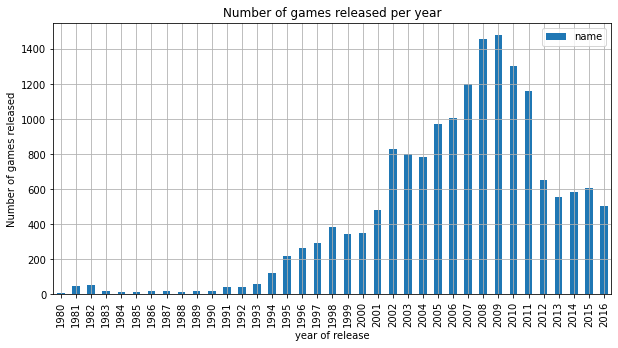

In [35]:
#Visualizing the number of games released for each year on a barplot
data.pivot_table(index = "year_of_release", values = "name", aggfunc = "count").plot(kind = "bar", 
                                                                                     grid = "True", figsize = (10,5))

plt.title("Number of games released per year")
plt.ylabel("Number of games released")
plt.xlabel("year of release")
plt.xticks(rotation= 90)

plt.show()


The number of games released was lowest in 1980, then increased gradually, however, below 200 until 1995. In 1995, the number of games released went above 200, and kept on increasing for each subsequent year until 2001. In 2002, there was a sharp increase. There were declines in the number of games released in 1999, and 2003. However, from 2004, the number of games increased steadily with the peak coming in 2009. From 2009, there was a decline.

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade

In [36]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no info,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no info,31.38


In [37]:
sales_platform = data.pivot_table(index = "platform", values = "total_sales", aggfunc = "sum")

sales_platform

,total_sales
platform,
2600,96.98
3do,0.10
3ds,259.00
dc,15.95
ds,806.12
gb,255.46
gba,317.85
gc,198.93
gen,28.35


In [38]:
#filtering the dataset to get platforms with the most sales
plat_best_sales_3 = sales_platform.query('platform in ("x360", "wii", "ds", "ps", "ps2", "ps3")').sort_values(
                                        "total_sales", ascending = False)

plat_best_sales_3.head(5)

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12


ps2 leads with over 1 billion in sales, followed by x360, ps3, wii, and ds. Taking the data for the platforms with the best sales, we would build a distribution based on data for each year. 

In [39]:
popular_platforms = plat_best_sales_3.head(5).index

In [40]:
#filtering the dataset to get data for the best platforms with the most sales 
#to build a distribution on data for each year 
plat_best_sales = data.query("platform in @popular_platforms")

plat_best_sales

plat_best_sales.groupby(["year_of_release","platform"])["total_sales"].sum().sort_values(ascending = False).unstack(1)


platform,ds,ps2,ps3,wii,x360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,182.87,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


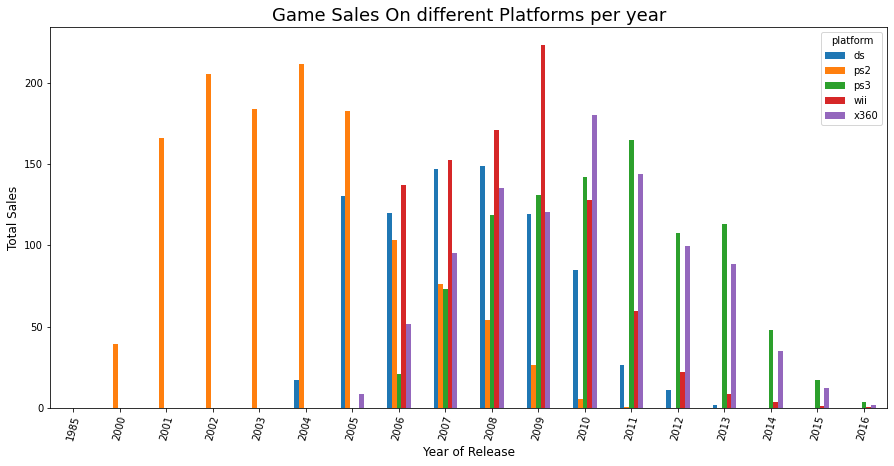

In [41]:
#plotting a bar plot to view the total sales of each platform for each year

plat_best_sales.groupby(["year_of_release","platform"])["total_sales"]\
.sum().sort_values(ascending = False).unstack(1).plot(kind = "bar", figsize = (15, 7))

plt.title('Game Sales On different Platforms per year', size=18);
plt.xticks(rotation=75)
plt.xlabel('Year of Release', size=12);
plt.ylabel('Total Sales', size=12);
plt.show()


Calculating the average lifespan of each game

In [42]:
#Calculating the average lifespan of each game

shofar = plat_best_sales.groupby(["year_of_release","platform"])["total_sales"].sum()\
                         .sort_values(ascending = False).reset_index()


In [43]:
#Grouping by the platforms, and aggregating to get the minimum and maximum "year_of_release" of each platform

red = shofar.groupby("platform")["year_of_release"].agg(["min","max"]).reset_index()

In [44]:
#Subtracting the Year of release of each platform to the year production was stopped, to get the average lifespan

red["lifespan"] = red["max"] - red["min"]

red["lifespan"]

0    28
1    11
2    10
3    10
4    11
Name: lifespan, dtype: int64

The platform ds has 28 years. Taking a look at the bar plot, it was first produced in 1985, after which the next year of production was in 2003. We would consider the year 1985 as an outlier, and consider the year of production for ds platform to be from 2003.

In [45]:
red.head()

,platform,min,max,lifespan
0,ds,1985,2013,28
1,ps2,2000,2011,11
2,ps3,2006,2016,10
3,wii,2006,2016,10
4,x360,2005,2016,11


In [46]:
#Calculating the average lifespan of the platforms

feds = red.loc[red["lifespan"] != 28, "lifespan"].mean()

feds

10.5

The average lifespan of the games is 10.5 years

Taking a look at the boxplot to view the average lifespan of the games.

<AxesSubplot:title={'center':'year_of_release'}, xlabel='platform'>

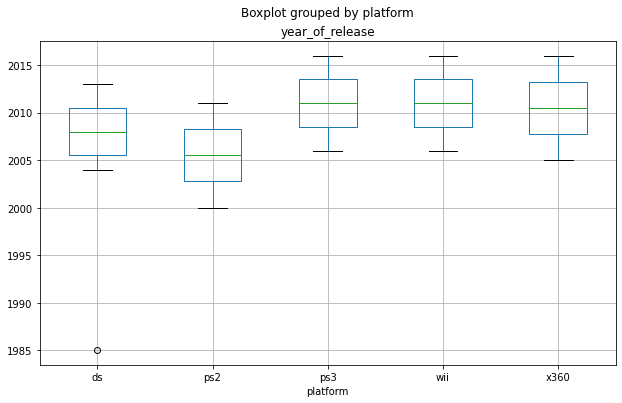

In [47]:
#Plotting a boxplot to view the average lifespan of each game

shofar = plat_best_sales.groupby(["year_of_release","platform"])["total_sales"].sum()\
                         .sort_values(ascending = False).reset_index()

shofar.boxplot(column = "year_of_release", by = "platform", figsize = (10,6))

Productions for PS2 were first rolled out in 2000, and it saw an increase in sales. Its highest number of sales was in 2004, after which there was a decline in sales till 2011. After 2011, PS2 had zero sales. Its successor PS3 was released in 2006, when PS2 was declining in sales. Its highest number of sales was in the year 2011, after which it started to decline. wii was released in 2006, its sales peaked in 2009, after which it started to decline. X360 was released in 2005, and its sales increased, and got to its peak in 2010. After 2010, sales declined steadildy. DS was released in 2004, became hugely popular in 2007 and 2008, after which it declined and registered zero sales after 2013.
On average, it takes 6 to 7 years for new consoles to appear, and an average of 10.5 years for a platform to completely disappear from the market.

For this project, our relevant data will be taken from the year 2012. We did not choose the average lifespan of a platform which should be 10 years because the market is dynamic, the industry is evolving, games are getting better, the graphics are also getting better and the users are more demanding. Therefore, for those genres that were popular in 2006, some of them were no longer popular as at 2015 to 2016. It would be unproductive to use data that dates back to 2006. 
Therefore, for our forecast for 2017, we would use take data on platforms from 2012, which is more recent. 

### Video games since 2012

In [48]:
#First we create a slice of rows where the year of release is from 2012 and above
data_2012_games = data.query('year_of_release >= 2012')

used_data_rank = data_2012_games.groupby("platform")["total_sales"].sum().sort_values(ascending = False).reset_index()

used_data_rank

,platform,total_sales
0,ps4,314.14
1,ps3,288.79
2,x360,236.54
3,3ds,195.80
4,xone,159.32
5,wiiu,82.19
6,pc,62.65
7,psv,49.44
8,wii,35.37
9,ds,12.55


ps4 leads in total sales since 2012, followed by ps3, x360, 3ds, and xone to make the top 5. Next, we find the platforms that are growing or shrinking.

In [49]:
#Grouping by year_of_release and platform we calculate the total sales of the platforms from 2012 to 2016
data_2012_games.groupby(["year_of_release","platform"])["total_sales"].sum().unstack(1)


platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,57.76,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Making a bar plot to see the total sales of all the selected platforms from 2012 to 2016

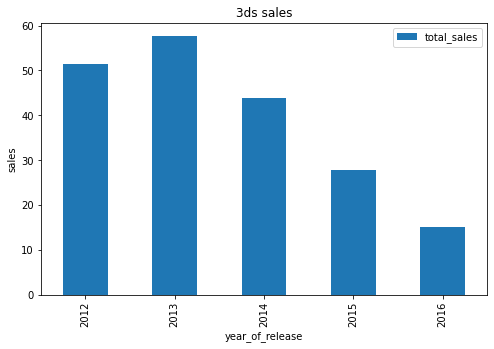

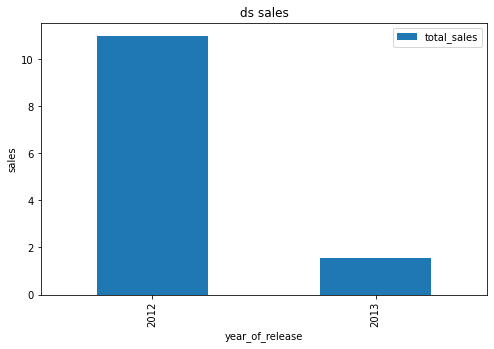

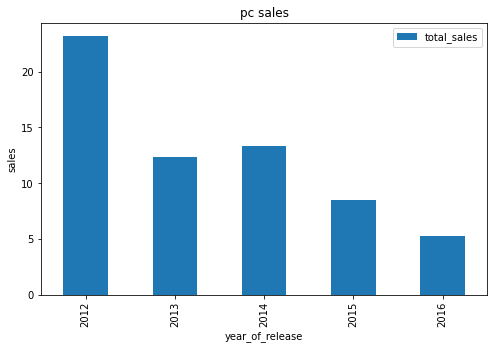

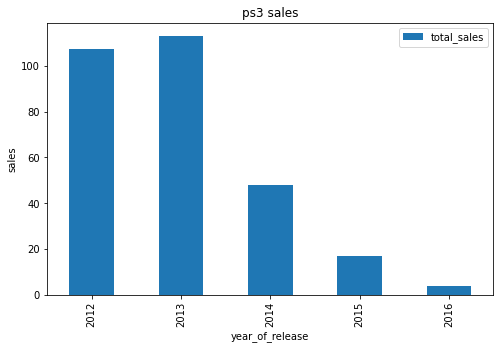

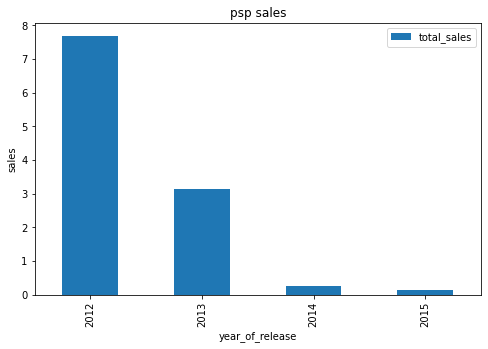

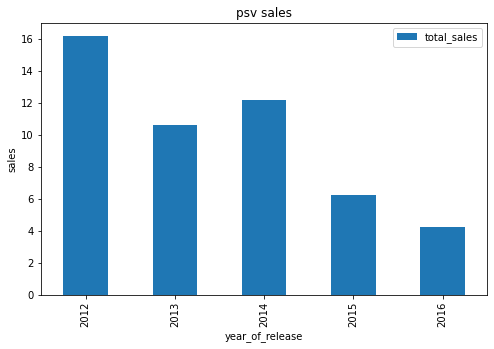

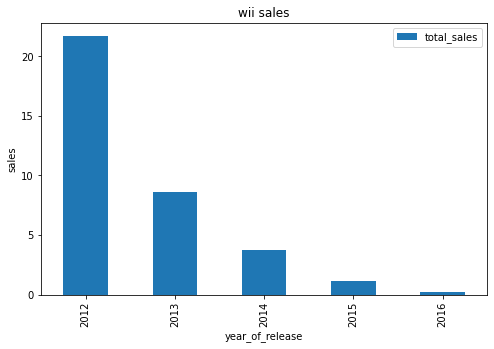

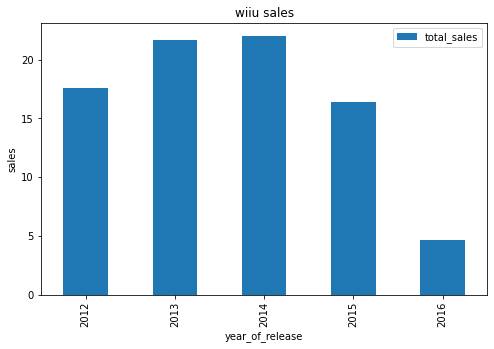

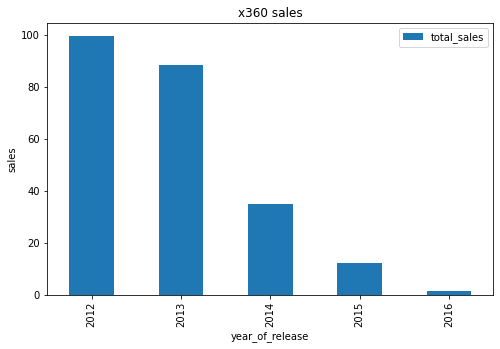

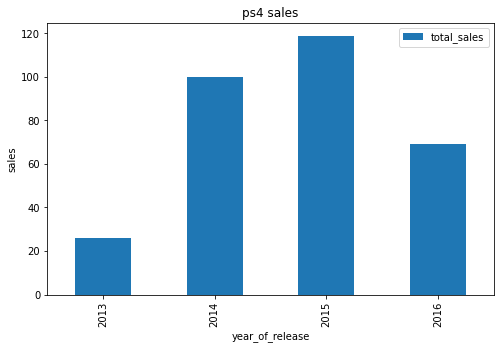

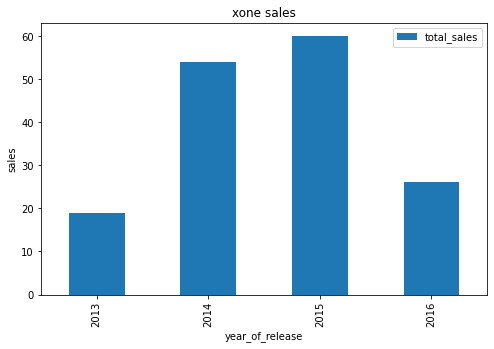

In [50]:
#Plotting a bar plot for all the platforms from 2011 till 2016

fiore = data_2012_games.groupby(["year_of_release","platform"])["total_sales"].sum().reset_index()

#I used unique() because I want distinct values from the platform
for sol in fiore['platform'].unique(): 
    data_fiore = fiore[fiore['platform'] == sol]
    #creates a slice of rows from fiore where the 'platform' takes the take al the values in sol.
    #If I set fiore['platform'] == 'xone' then the code will plot for just xone for all 
    # the number of platforms in sol
    data_fiore.plot(kind ="bar", x= "year_of_release", y= "total_sales", figsize = (8, 5))
    
    plt.title('{} sales'.format(sol)) #gives the title of the chart
    plt.ylabel("sales")
    plt.xlabel("year_of_release")
    plt.show()
    
    


    

The platforms that are shrinking in sales are ps3, x360, wiiu, wii, pc, and psv. While xone and ps4, 3ds are the growing platforms that could be potentially profitable. The bins of the potentially profitable platforms (xone, 3ds and ps4) in 2016 seem to be lower than previous years. Well, the reason for that could be that the games are still in the early parts of their lifespan, so we can expect them to make more profits at least for the next 2 or 3 years. Other platforms were either having very low sales in 2016, or had stopped sales altogether before 2016.

### Comparing sales on potentially profitable platforms

The platforms that are considered to be potentially profitable are those that can still make sales in 2017, based on their performance in 2016. Such platforms are: 3ds, xone, ps4, pc, wiiu, psv, and ps3

(0.0, 2.0)

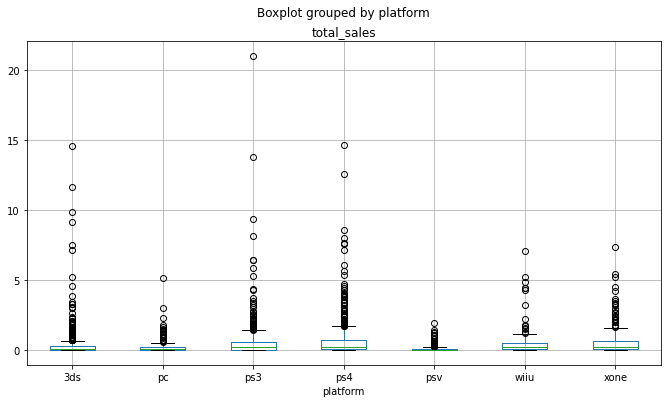

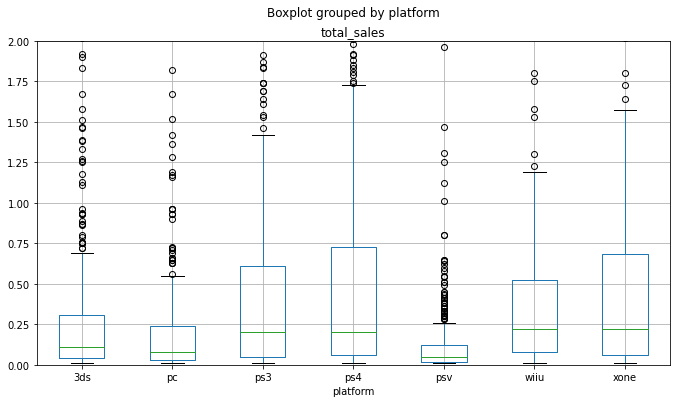

In [51]:
#Creating a slice from data_2012_games and filtering for 3ds, xone, ps4, pc, wiiu, psv
plat_profit = data_2012_games.query('platform in ("3ds", "xone", "ps4", "pc", "wiiu", "psv","ps3")')
 

    
#Making a boxplot to visualize total sales by chosen platforms 
plat_profit.boxplot(column = "total_sales", by= "platform", figsize = (11,6))

#Inceasing the scale of the boxplot using ylim
ax = plat_profit.boxplot(column = "total_sales", by= "platform", figsize = (11,6))
ax.set_ylim([0, 2])

From the boxplots we can see that there is no significant difference between the medians and typical sales interval of ps4, ps3, wiiu, and xone. 
The median of other platforms are very low with psv being the lowest, which is close to zero. 

For each of the platforms we have a lot of outlier values in total sales. These outliers are some popular games. Taking a look at the 3ds platform. It is a small box with lots of outliers. This suggests that a large part of the sales volumes comes from these outliers. 
At the same time, the XOne has a different situation: a large box, a long whisker and few outliers. This indicates that a wide variety of games are bought on XOne, and in considerable quantities.

## Effect of user and professional reviews on sales

In [52]:
plat_profit.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no info,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,no info,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


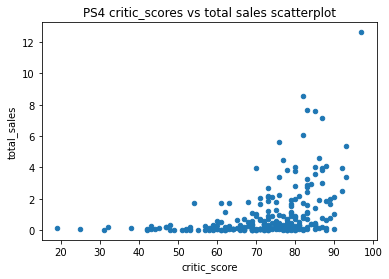

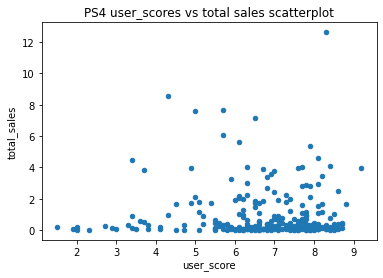

In [53]:
#Creating a slice of rows from ps4_data
ps4_data = plat_profit.query('platform == "ps4"')

for sho in ps4_data.columns:
    if (sho == "critic_score") | (sho == "user_score"):
        ps4_data.plot(x=sho, y ="total_sales", kind = "scatter")
        
        plt.title("PS4 {}s vs total sales scatterplot".format(sho))

Taking a look at the correlation coefficient.

In [54]:
#prints the correlation coefficient between critic score vs total sales for ps4
print(ps4_data["critic_score"].corr(ps4_data["total_sales"]))

#prints the correlation coefficient between user score vs total sales for ps4
print(ps4_data["user_score"].corr(ps4_data["total_sales"]))


0.40656790206178095
-0.031957110204556424


The results show that both "user_score" and "critic_score" have little to no correlation with sales. This means that high quality does not guarantee commercial success for ps4 games. 

We have to check if this occurs accross other platforms. We first take a look at Xbox One. 

### Xbox One

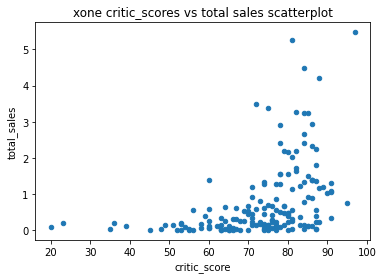

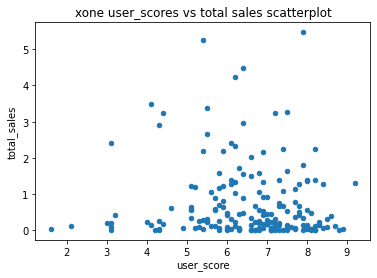

In [55]:
#Creating a slice of rows from xone data
xone_data = plat_profit.query('platform == "xone"')

for pro in xone_data.columns:
    if (pro == "critic_score") | (pro == "user_score"):
        xone_data.plot(x= pro, y ="total_sales", kind = "scatter")
        
        plt.title("xone {}s vs total sales scatterplot".format(pro))

In [56]:
#checking the correlation coefficient between critic score vs total sales for xone
print(xone_data["critic_score"].corr(xone_data["total_sales"]))

#checking the correlation coefficient between user score vs total sales for xone
print(xone_data["user_score"].corr(xone_data["total_sales"]))


0.4169983280084017
-0.06892505328279414


We arrive at the same conclusion here: Critic scores and user scores have little or no linear correlation with total sales. 

Next, we look at 3ds

### 3ds

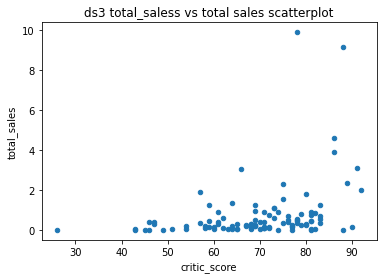

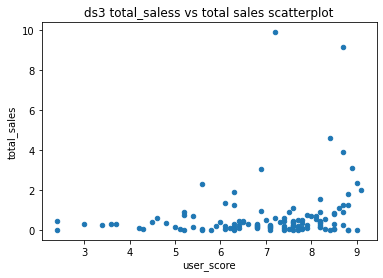

In [57]:
#Creating a slice of rows from ps3 data
ds3_data = plat_profit.query('platform == "3ds"')

for pre in ds3_data.columns:
    if (pre == "critic_score") | (pre == "user_score"):
        ds3_data.plot(x= pre, y ="total_sales", kind = "scatter")
        
        plt.title("ds3 {}s vs total sales scatterplot".format(pro))

In [58]:
#checking the correlation coefficient between critic score vs total sales for 3ds
print(ds3_data["critic_score"].corr(ds3_data["total_sales"]))

#checking the correlation coefficient between user score vs total sales for 3ds
print(ds3_data["user_score"].corr(ds3_data["total_sales"]))


0.323378043752059
0.20373479097542724


3ds also gives the same result. Critic scores and user scores have little or no linear correlation with total sales. 

## Most profitable genres

Taking a look at all the genres in the dataset

In [59]:
data_2012_games["genre"].unique()

array(['action', 'shooter', 'role-playing', 'platform', 'misc',
       'simulation', 'sports', 'fighting', 'racing', 'strategy',
       'adventure', 'puzzle'], dtype=object)

Counting the number of times each genre was listed in the datatset

In [60]:
genre_games = data_2012_games["genre"].value_counts()

genre_games

action          1032
role-playing     372
adventure        303
sports           269
shooter          236
misc             192
racing           116
fighting         109
platform          85
simulation        82
strategy          71
puzzle            28
Name: genre, dtype: int64

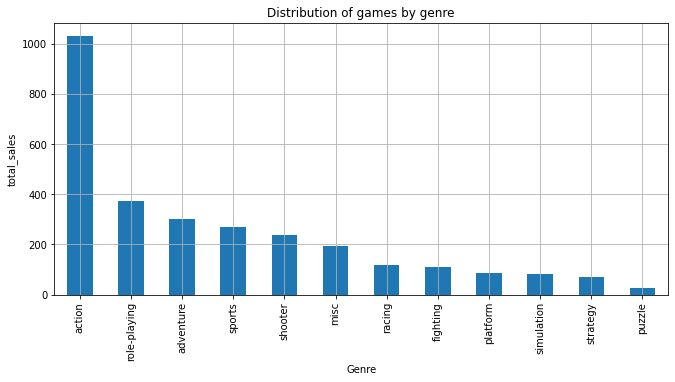

In [61]:
#plotting a bar plot to view the distribution by genre

genre_games.plot(kind = "bar", grid = True, figsize = (11,5))
plt.title("Distribution of games by genre")
plt.ylabel("total_sales")
plt.xlabel("Genre")
plt.show()

Action movies have the highest number of releases from 2012 to 2016. The number of games whose genre are classified under action movies are over 1000. Next are role-playing and adventure, with over 350 games. The least is puzzle, with less than 100 games.

Taking a look at the genres released since 2006 to see the most profitable.

In [62]:
#Using a pivot table to look for the most profitable genres
data_2012_games.pivot_table(index = "genre", values = "total_sales",  aggfunc = ["sum","mean","count"])
                        

,sum,mean,count
,total_sales,total_sales,total_sales
genre,,,
action,441.52,0.427829,1032
adventure,29.52,0.097426,303
fighting,44.49,0.408165,109
misc,85.04,0.442917,192
platform,61.00,0.717647,85
puzzle,4.89,0.174643,28
racing,53.59,0.461983,116
role-playing,193.09,0.519059,372


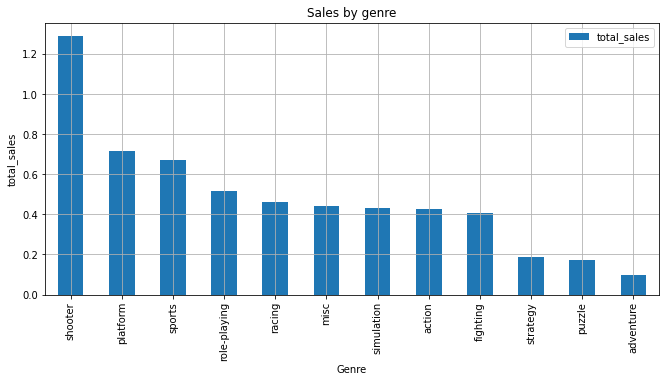

In [63]:
#Using a pivot table to look for the total sales of all the genres
data_2012_games.pivot_table(index = "genre", values = "total_sales",  aggfunc = "mean" ).\
sort_values("total_sales", ascending = False).plot(kind = "bar", grid = True, figsize = (11,5))
plt.title("Sales by genre")
plt.ylabel("total_sales")
plt.xlabel("Genre")
plt.show()

To get the most profitable genres in the dataset, we find the average sales. From the average sales, the most profitable genre is shooter, next is platform, then sports. While strategy, puzzle and adventure are the least profitable. The genres that sell most (shooter to racing) require very high graphics, while the games that sell the least (strategy to adventure) do not require much graphical work on the part of designers.

## Users Profile for each region

## North America

We will find the top 5 platforms, game ratings and genres that sell most in North America

In [64]:
data_2012_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no info,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,no info,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


platform
x360    140.05
ps4     108.74
ps3     103.38
xone     93.12
3ds      56.15
Name: na_sales, dtype: float64


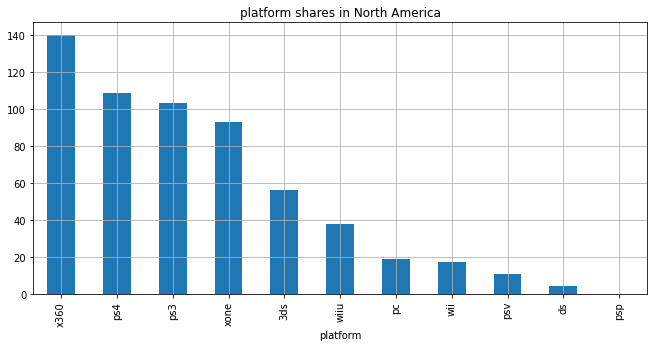


rating
M          231.57
E          114.49
no info    103.59
E10+        75.96
T           66.31
Name: na_sales, dtype: float64


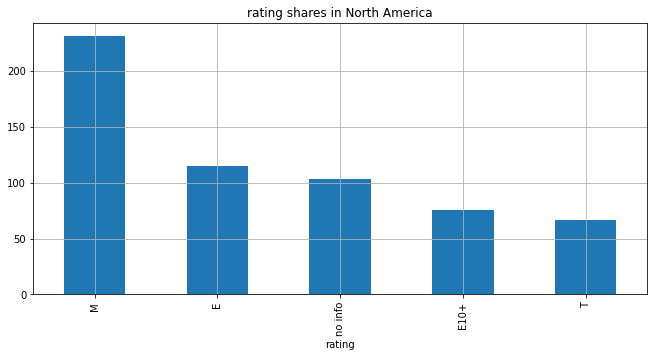


genre
action          178.02
shooter         144.81
sports           81.53
role-playing     64.11
misc             38.19
Name: na_sales, dtype: float64


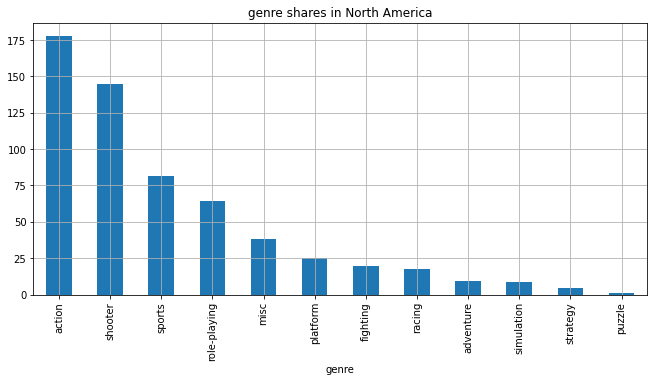

In [65]:
#Creating an array called na_sales_top with entries "platform", "genre", and "rating" 
na_sales_top = data_2012_games[["platform", "rating", "genre"]]

for pre in na_sales_top: #loops through the array
    na_sales_slice = data_2012_games.groupby(pre)["na_sales"].sum().sort_values(ascending=False)
    #groups the data in data_2006_games by the present column and gets the sum of the
    #north american sales for each of its values, sorting them in descending order
    print(na_sales_slice.head())
    na_sales_slice.plot(kind = "bar", grid = True, figsize = (11,5))#Creating a pie chart for grouping
    plt.title("{} shares in North America".format(pre))
    plt.show()
    print("") #print an empty line
    
    

For the North American market, the top 5 platforms are x360, ps4 , ps3, xone, and 3ds. The top 5 genres are action, shooter, sports, role-playing, and misc. Games rated "M" (Mature) sell the highest, followed by "E" (Everyone), then games that had no rating "no info"

## Europe

platform
ps4     141.09
ps3     106.86
x360     74.52
xone     51.59
3ds      42.85
Name: eu_sales, dtype: float64


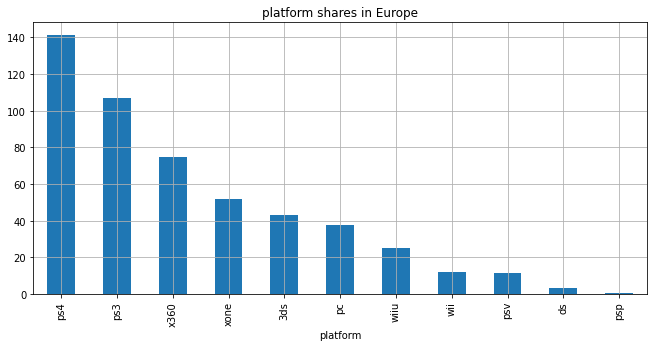


rating
M          193.96
E          113.05
no info     91.50
E10+        55.56
T           53.01
Name: eu_sales, dtype: float64


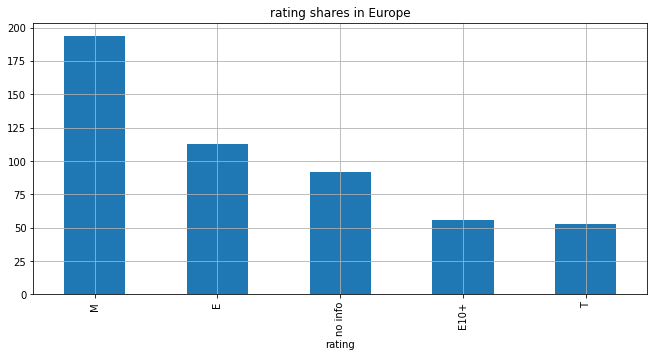


genre
action          159.53
shooter         113.49
sports           69.09
role-playing     48.58
racing           27.29
Name: eu_sales, dtype: float64


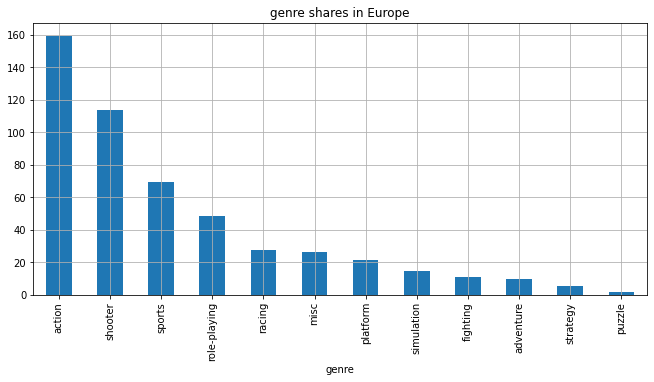

In [66]:
#Creating an array called eu_sales_top with entries "platform", "genre", and "rating" 
eu_sales_top = data_2012_games[["platform", "rating", "genre"]]

for you in eu_sales_top: #loops through the array
    eu_sales_slice = data_2012_games.groupby(you)["eu_sales"].sum().sort_values(ascending=False)
    #groups the data in data_2006_games by the present column and gets the sum of the
    #north american sales for each of its values, sorting them in descending order
    print(eu_sales_slice.head())
    eu_sales_slice.plot(kind = "bar", grid = True, figsize = (11, 5)) #Creating a pie chart for grouping
    plt.title("{} shares in Europe".format(you))
    plt.show()
    print("") #print an empty line
    


For the Europe market, the top 5 platforms are ps4, ps3, x360, xone, 3ds. The top 5 genres are action, shooter, sports, role-playing and racing. Games rated "M" (Mature) sold the highest, followed by "E" (Everyone), then games that had no rating "no info"

## Japan

platform
3ds     87.84
ps3     35.29
psv     21.11
ps4     15.96
wiiu    13.01
Name: jp_sales, dtype: float64


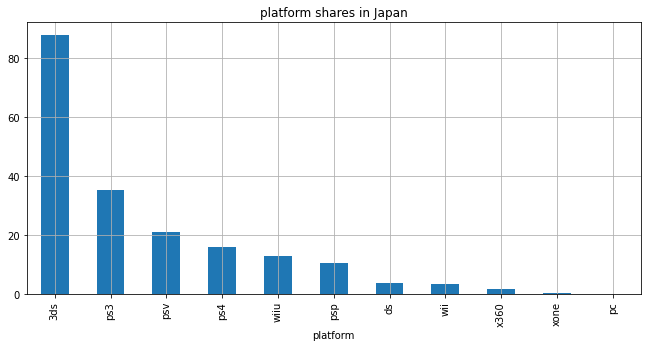


rating
no info    108.89
E           28.33
T           26.09
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64


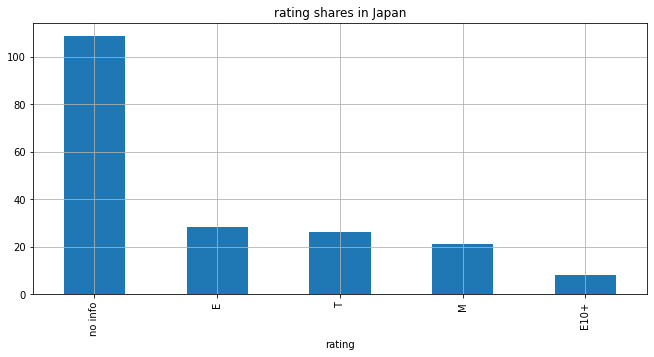


genre
role-playing    65.54
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
Name: jp_sales, dtype: float64


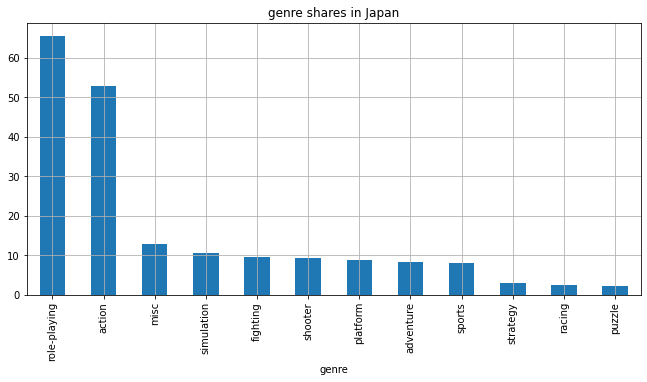

In [67]:
#Creating an array called ja_sales_top with entries "platform", "genre", and "rating"
ja_sales_top = data_2012_games[["platform", "rating", "genre"]]

for york in ja_sales_top: #loops through the array
    ja_sales_slice = data_2012_games.groupby(york)["jp_sales"].sum().sort_values(ascending = False)
    #groups the data in data_2006_games by the present column and gets the sum of the
    #japanese sales for each of its values, sorting them in descending order
    print(ja_sales_slice.head())
    ja_sales_slice.plot(kind = "bar", grid = True, figsize = (11,5)) #creating a pie chart for grouping
    plt.title("{} shares in Japan".format(york))
    plt.show()
    print("") #prints an empty line
    
    
    

For the Japanese market, the top 5 platforms are 3ds, ps3, psv, ps4, wiiu. The top 5 genres are role-playing, action, misc, simulation, and fighting. The top selling ratings are games that have no information on ratings "no info", followed by "E", then "T".

**Conclusion**

After studying the user preferences in North America, Europe, and Japanese regions from 2012. The regions in North America show preference for home consoles like x360, ps4, ps3, xone and 3ds

In North America, x360 had the highest sales from the total sales made by all the platforms. ps4, ps3, and xone together, approximately make up for half of the total sales. 

In Europe, ps4, ps3, x360, xone, and 3ds make up for three-quarter of the total sales of all the platforms, with ps4 having the highest sales. 

The Japanese Market shows a general preference for handheld devices. 3ds had the highest share, while psv comes third in market share value. 3ds takes more than a quarter of the total platform sales.

The genre preferred by regions in North America and EU are action, sports and shooter. While the genre that is most preferred by the Japanese Market is role-playing, next is action and misc. 

As for ratings, North America and EU prefer games rated "M" (Mature), followed by "E" (Everyone), and then games that had no ratings "no info". While in Japan, the preference is for games that no ratings "no info", followed by "E" (Everyone), and then T (Teens).

Games without rating have more success in Japan because the ratings for games in North America, and Europe does not apply to video games in Japan. Japanese games have their own rating system. Threfore, games that are not rated in Europe, and America, are very popular among the Japanese populace

## Hypothesis Testing

### Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same

The Null Hypothesis for this test will be that "Average user ratings of the Xbox One and PC platforms are the same". Therefore, our alternate hypothesis will be "Average user ratings of the Xbox One and PC platforms are not the same". Before testing the hypothesis, we need to test if the variances of the two platforms are equal. Levene's test will be used to perform this test using the st.levene() method. This method will take the user_score for both "xone", and "pc" as arguments, and set the parameter center = "mean". This method will return a value that will be compared to a threshold called the statistical significance value called alpha. alpha has been set to 0.05. The first point of call will be to filter for the two platforms "xone" and "pc"

In [68]:
#Creating a slice of rows from data_2012_games where the platform is xone

xone_data = data_2012_games.query('platform == "xone"')

xone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int64  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     169 non-null    float64
 9   user_score       182 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.1+ KB


In [69]:
#Creating a slice of rows from data_2012_games where the platform is pc

pc_data = data_2012_games.query('platform == "pc"')
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 192 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             250 non-null    object 
 1   platform         250 non-null    object 
 2   year_of_release  250 non-null    int64  
 3   genre            250 non-null    object 
 4   na_sales         250 non-null    float64
 5   eu_sales         250 non-null    float64
 6   jp_sales         250 non-null    float64
 7   other_sales      250 non-null    float64
 8   critic_score     198 non-null    float64
 9   user_score       206 non-null    float64
 10  rating           250 non-null    object 
 11  total_sales      250 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.4+ KB


Using st levene's test to show if the variance of the two statistical populations are equal

In [70]:
#using Levene's test to test the equality of the variances

alpha = 0.05 #critical statistical significance

#implementing levene's test to the columns specifying that the variances were calculated from the mean
result_lev_test = st.levene(xone_data.dropna()["user_score"], pc_data.dropna()["user_score"], center = "median")


print("p-value:", result_lev_test.pvalue)

if result_lev_test.pvalue < alpha: #if the p-value is less than alpha
    print("The variances are not the same")
else:
    print("The variances are the same")


p-value: 0.012818935705571605
The variances are not the same


The statistical test that will be used to prove the hypothesis will be "ttest", and the st.ttest_ind() method will be used to test for equality of averages between the two statistical populations. The alpha value will be set at 0.05. The st.ttest_ind() returns a p-value which is compared to alpha = 0.05. If p-value is less than alpha, we reject the Null Hypothesis. If p-value is greater than alpha then we cannot reject the Null Hypothesis.

In [71]:
alpha = 0.05 #critical statistical significance

result_hyp_test = st.ttest_ind(xone_data.dropna()["user_score"], pc_data.dropna()["user_score"], equal_var = False)

print("p-value:", result_hyp_test.pvalue)

#checking our hypothesis
if result_hyp_test.pvalue < alpha:
    print("we reject the null hypothesis")
else:
    print("we cannot reject the null hypothesis")


p-value: 0.5926561176517491
we cannot reject the null hypothesis


p-value is higher than the alpha value. This tells us that the Average user ratings of the Xbox One and PC platforms are the same. Therefore our Null Hypothesis can't be rejected.

### Hypothesis 2: Average user ratings for the Action and Sports genres are different

The Null Hypothesis for this test will be "Average user ratings for the Action and Sports genres are not different". Therefore, our alternate hypothesis will be "Average user ratings for the Action and Sports genres are different". The alpha value will be set at 0.05. If p-value is less than alpha, we reject the Null Hypothesis. If p-value is greater than alpha then we cannot reject the Null Hypothesis.

In [72]:
#Creating a slice of rows from data_2012_games where the genre is Action

action_data = data_2012_games.query('genre == "action"')

action_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1032 non-null   object 
 1   platform         1032 non-null   object 
 2   year_of_release  1032 non-null   int64  
 3   genre            1032 non-null   object 
 4   na_sales         1032 non-null   float64
 5   eu_sales         1032 non-null   float64
 6   jp_sales         1032 non-null   float64
 7   other_sales      1032 non-null   float64
 8   critic_score     437 non-null    float64
 9   user_score       524 non-null    float64
 10  rating           1032 non-null   object 
 11  total_sales      1032 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 104.8+ KB


In [73]:
#Creating a slice of rows from data_2012_games where the genre is sports

sports_data = data_2012_games.query('genre == "sports"')

sports_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             269 non-null    object 
 1   platform         269 non-null    object 
 2   year_of_release  269 non-null    int64  
 3   genre            269 non-null    object 
 4   na_sales         269 non-null    float64
 5   eu_sales         269 non-null    float64
 6   jp_sales         269 non-null    float64
 7   other_sales      269 non-null    float64
 8   critic_score     143 non-null    float64
 9   user_score       195 non-null    float64
 10  rating           269 non-null    object 
 11  total_sales      269 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 27.3+ KB


In [74]:
alpha = 0.05 #critical statistical significance

result_hyp_test = st.ttest_ind(action_data.dropna()["user_score"], sports_data.dropna()["user_score"], equal_var = False)

print("p-value:", result_hyp_test.pvalue)

#checking our hypothesis
if result_hyp_test.pvalue < alpha:
    print("we reject the null hypothesis")
else:
    print("we cannot reject the null hypothesis")


p-value: 6.000451347280956e-14
we reject the null hypothesis


p-value is lower than the alpha value. This tells us that Average user ratings for the Action and Sports genres are different. Therefore, the Null Hypothesis is rejected.

## General Conclusion

We collected and analyzed data on several video games, and platforms to identify games that will be profitable, and plan ad campaigns accordingly for the following year. On average, it takes 6 to 7 years for new consoles to appear, and an average of 10.5 years for a platform to completely disappear from the market. 

To make valid predictions for the next year on games that we should place in our ad campaigns, we considered data from the year 2012 upwards. This was done because we wanted results that could communicate current realities like the dynamics of the market, evolving industries, user demands, and ever improving graphics of the video games. From 2012, ps4 had the highest total sales of about 314.14 million, followed by ps3 with a total sales of 288.79 million, then x360, 3ds, and xone to make the top 5. 

The platforms ds, and psp had stopped sales before 2016, while wii, and x360 shrank in total sales. The platforms that were considered to be potentially profitable were those that could still make sales in 2017, based on their performance in 2016. Such platforms are: 3ds, xone, ps4, pc, wiiu, psv, and ps3.

There was no significant difference between the medians and typical sales interval of ps4, ps3, wiiu, and xone. For each of the platforms there were a lot of outlier values in total sales.These outliers indicate that the total sales value for the platforms are far from the typical total sales value.

From the data, we found out that there are several factors that contribute to the success of a game and there are those that don't. The critic score, and user score had no effect on the total sales. However, we also found out that the popularity of a platform will vary based on the genre, console, and country the game is released in. 

Of all the genres, the most profitable is shooter, next is platform, then sports. 

Regions in North America and Europe show preference for home consoles like x360, ps4, ps3, xone and 3ds. While the Japanese Market shows a general preference for handheld devices. 3ds had the highest share, while psv comes third in market share value. 3ds takes more than a quarter of the total platform sales.

The genre preferred by regions in North America and EU are action, sports and shooter. While the genre that is most preferred by the Japanese Market is role-playing, next is action and misc.

As for ratings, North America and EU prefer games rated "M" (Mature), followed by "E" (Everyone), and then games that had no ratings "no info". While in Japan, the preference is for games that have no ratings "no info", followed by "E" (Everyone), and then T (Teens).

Games without rating have more success in Japan because the ratings for games in North America, and Europe does not apply to video games in Japan. Japanese games have their own rating system. Threfore, games that are not rated in Europe, and America, are very popular among the Japanese populace.

We tested hypotheses; we could not reject the hypothesis that Average user ratings of the Xbox One and PC platforms are the same, and the hypothesis that Average user ratings for the Action and Sports genres are different was upheld.

For the Ad campaign, for the next year, the company should make a separate ad for North America, and Europe, then another ad for Japan. Japanese ads should focus more on handheld platforms, games that have no ratings, and the top two genres, namely: role-playing, and action.

The ads for Europe and North America should focus on home consoles, the top two genres, namely: action, and sports, and games that are rated M(Mature), and E (everyone).